In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from itertools import product

In [2]:
df = pd.read_csv('C:\\Users\\30698\\Downloads\\a1_data.csv')

## CODE

In [3]:
df.head(10)

,A,B,C,D,E,F,G,H,I,J,K
0,3.179665,3.030625,3.222752,2.836624,3.386284,1.910165,2.179628,3.464657,3.705143,3.921797,3.566766
1,3.313155,3.127535,3.367189,2.799483,2.527001,2.359419,2.461049,3.394200,3.002324,3.487035,3.753581
2,3.531847,3.554489,3.441636,2.582776,2.730851,2.263097,2.461049,3.452962,3.531599,3.773342,3.254741
3,3.621384,3.828081,3.640896,2.704508,1.727649,1.855651,2.021082,3.570291,3.611415,3.725917,3.328318
4,3.285691,3.206716,2.992451,2.562289,3.011359,2.414187,2.612864,3.331957,3.143080,3.679484,3.874796
5,3.032219,2.484086,3.522796,2.918565,2.654335,2.165465,2.359102,3.632987,3.611415,3.960633,3.726634
6,3.410307,3.472343,3.294317,3.694746,2.829095,2.027454,2.202031,3.769343,3.650785,3.824646,3.222385
7,3.433839,3.086142,3.441636,3.058473,2.859946,2.395256,2.605261,3.516043,3.283580,3.656941,3.265736
8,3.775094,3.698926,3.302590,2.898456,3.238083,2.150617,2.320238,3.496017,3.940077,4.054881,3.367826
9,3.082344,3.242489,2.551445,3.885926,3.257388,2.210488,3.079494,3.176037,3.639047,3.696062,3.969027


In [4]:
df.shape

(11672, 11)

In [5]:
df.describe()

,A,B,C,D,E,F,G,H,I,J,K
count,11672.000000,11672.000000,11672.000000,11672.000000,11672.000000,11672.000000,11672.000000,11672.000000,11672.000000,11672.000000,11672.000000
mean,3.581855,3.463647,3.452983,3.260402,2.984953,3.075823,3.197797,3.487102,3.351592,3.258339,3.274824
std,0.378379,0.353852,0.395709,0.577910,0.492341,0.532411,0.477088,0.381390,0.434271,0.657896,0.436652
min,1.711091,1.539091,1.236145,1.325193,1.395194,1.092741,1.120213,0.711992,1.294027,0.693624,1.648960
25%,3.374607,3.269612,3.229361,2.840228,2.684764,2.706726,2.891299,3.312105,3.056303,3.110205,3.003621
50%,3.586721,3.452918,3.495931,3.273143,2.980771,3.097046,3.230381,3.488138,3.346475,3.371435,3.293180
75%,3.816371,3.672239,3.703152,3.708043,3.297037,3.438193,3.515241,3.710964,3.678814,3.669142,3.542723
max,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000


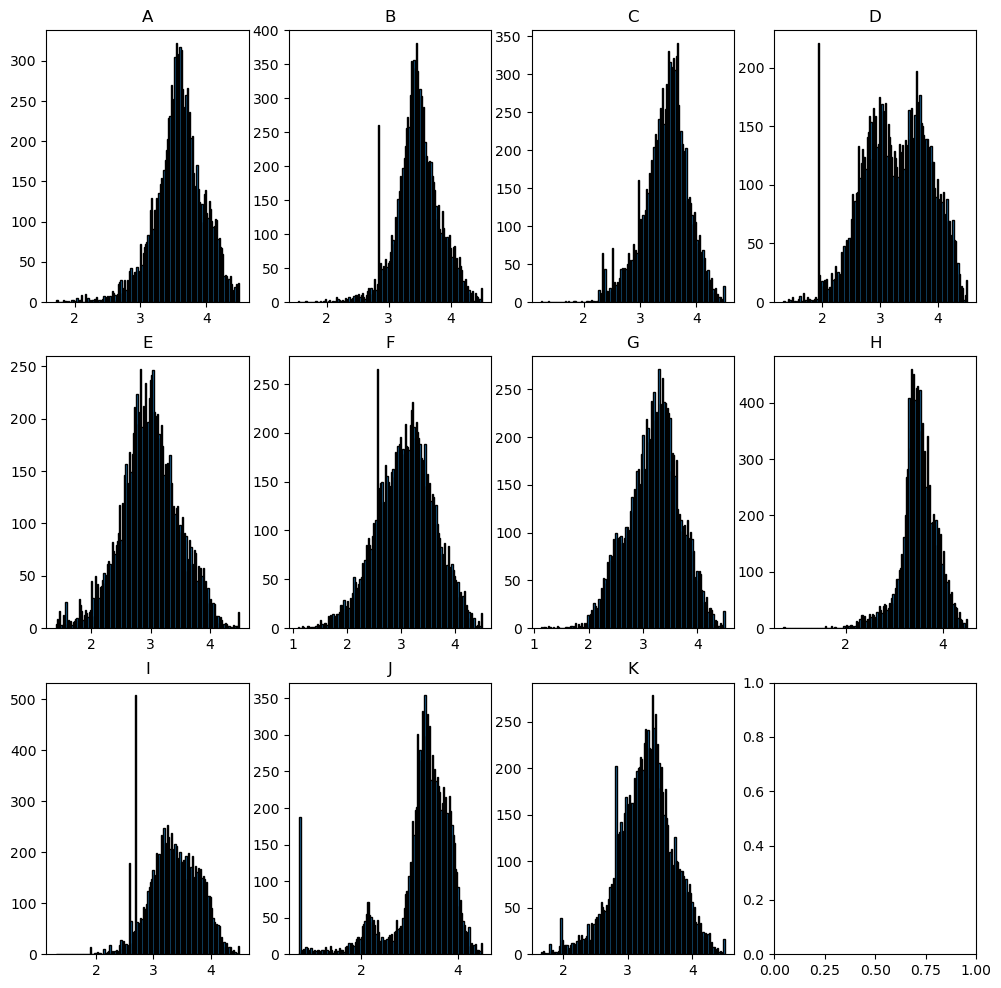

In [6]:
# Plot the distributions

fig, axs = plt.subplots(3, 4, figsize=(12, 12))
axs = axs.flatten()

for ax, col in zip(axs, df.columns):
    ax.set_title(col)
    ax.hist(df[f'{col}'], 150, edgecolor='black')
plt.show()

### Evi's correlation way

In [7]:
# Take every pair and compute the corr coeff and p value

uncorr_pairs = []
pairs = list(product(df.columns, df.columns))
pairs = [pair for pair in pairs if pair[0] != pair[1]]

for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2:
            corr_coef, p_value = pearsonr(df[col1], df[col2])
            if p_value > 0.05:
                uncorr_pairs.append((col1, col2))
corr_pairs = [pair for pair in pairs if pair not in uncorr_pairs]

In [8]:
# F test and create the DAG

DAG = []

for pair in corr_pairs:
    f_value = np.var(df[pair[0]]) / np.var(df[pair[1]])
    if f_value > 1:
        DAG.append(f'{pair[0]} ' + '<-- ' + f'{pair[1]}')
    else:
        DAG.append(f'{pair[0]} ' + '--> ' + f'{pair[1]}')
for pair in uncorr_pairs:
    DAG.append(f'{pair[0]} ' + '-- ' + f'{pair[1]}')

for pair1 in DAG:
    for pair2 in DAG:
        if pair1[0] == pair2[-1]:
            DAG.remove(pair1)
            break
            
DAG

['A --> C',
 'A --> E',
 'A --> I',
 'A --> K',
 'B --> C',
 'B --> F',
 'B --> H',
 'B --> J',
 'C <-- A',
 'C --> D',
 'C --> F',
 'C --> J',
 'D <-- A',
 'D <-- C',
 'D --> J',
 'E <-- C',
 'E --> F',
 'E <-- I',
 'E <-- K',
 'F <-- C',
 'F <-- G',
 'F <-- I',
 'G <-- B',
 'G --> F',
 'G --> J',
 'H <-- A',
 'H --> E',
 'H --> G',
 'H --> J',
 'I <-- A',
 'I --> E',
 'I <-- H',
 'I --> K',
 'J <-- B',
 'J <-- D',
 'J <-- F',
 'J <-- H',
 'J <-- K',
 'K <-- B',
 'K --> E',
 'K <-- H',
 'K --> J',
 'A -- G',
 'C -- H',
 'D -- F',
 'D -- H',
 'D -- K',
 'E -- G',
 'F -- D',
 'G -- A',
 'G -- E',
 'H -- C',
 'I -- C',
 'I -- G',
 'K -- F']

In [9]:
len(DAG)

55

In [10]:
#Draw the DAG

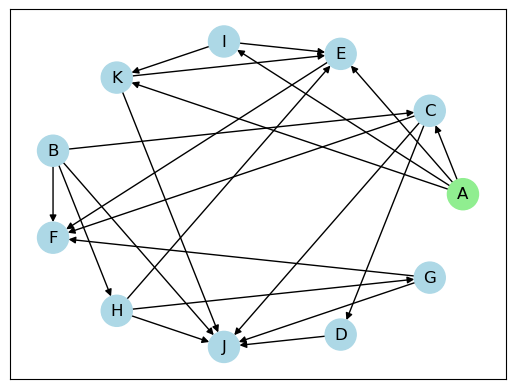

In [11]:
from matplotlib import pyplot as plt
import networkx as nx

g1 = nx.DiGraph()
g1.add_edges_from([("A", "C"), ("A", "E"), ("A", "I"), ("A", "K"), ("B", "C"), ("B", "F"),("B", "H"), ("B", "J"), ("C", "D"), ("C", "F"), ("C", "J"), ("D", "J"),("E", "F"), ("G", "F"), ("G", "J"), ("H", "E"), ("H", "G"), ("H", "J"),("I", "E"), ("I", "K"), ("K", "E"), ("K", "J")])

node_sizes = [500]*len(g1.nodes)
node_colors = ['lightblue']*len(g1.nodes)
node_colors[0] = 'lightgreen' # set the color of the root node to green
edge_colors = ['black']*len(g1.edges)

pos = nx.circular_layout(g1)
nx.draw_networkx(g1, pos=pos, arrows=True, node_size=node_sizes, node_color=node_colors, edge_color=edge_colors)

plt.show()

In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Define the DAG
g1 = nx.DiGraph()
g1.add_edges_from([("A", "C"), ("A", "E"), ("A", "I"), ("A", "K"), ("B", "C"), ("B", "F"),("B", "H"), ("B", "J"), ("C", "D"), ("C", "F"), ("C", "J"), ("D", "J"),("E", "F"), ("G", "F"), ("G", "J"), ("H", "E"), ("H", "G"), ("H", "J"),("I", "E"), ("I", "K"), ("K", "E"), ("K", "J")])

# Set the exposure and outcome variables
exposure = "B"
outcome = "D"

# Find all paths from the exposure to the outcome
all_paths = nx.all_simple_paths(g1, source=exposure, target=outcome)

# Identify open paths and confounders using the backdoor criterion
confounders = set()
for path in all_paths:
    for i in range(len(path) - 2):
        node = path[i+1]
        if node not in confounders and g1.out_degree(node) > 0:
            # This node is a collider and a potential confounder
            parents = list(g1.predecessors(node))
            common_causes = set(parents).intersection(confounders)
            if not common_causes:
                # This node is a confounder because it is a common cause of the exposure and outcome,
                # and it is not a descendant of the exposure or a collider on any backdoor path
                non_descendants = set(g1.nodes()) - set(nx.descendants(g1, exposure))
                non_collider_ancestors = set()
                for parent in parents:
                    if g1.out_degree(parent) > 0:
                        non_collider_ancestors.update(nx.ancestors(g1, parent))
                backdoor_paths = []
                for node2 in non_descendants.intersection(non_collider_ancestors):
                    backdoor_paths += nx.all_simple_paths(g1, source=exposure, target=outcome, cutoff=None)
                for path2 in backdoor_paths:
                    if set(parents).intersection(path2):
                        # This path is blocked by a collider, so it doesn't need to be considered
                        continue
                    elif set(path[i+2:]).intersection(path2):
                        # This path intersects with the original path downstream of the confounder,
                        # so it doesn't block the original path
                        continue
                    else:
                        # This path is a backdoor path that is not blocked by a collider or intersecting path,
                        # so the confounder is required to adjust for confounding
                        confounders.add(node)
                        break

# Check whether the identified confounders are sufficient to adjust for confounding
if confounders:
    data = pd.DataFrame(np.random.randn(100, 11), columns=list('ABCDEFGHIJK'))
    data[outcome] = data[exposure] + data["B"] + data["E"] + data["K"] + np.random.randn(100)
    X = data[list(confounders) + [exposure]]
    Y = data[outcome]
    model = sm.OLS(Y, X).fit()
    print(model.summary())
else:
    print("No confounders identified")

No confounders identified


In [13]:
# Find all open paths from the exposure to the outcome
open_paths = []
for path in all_paths:
    is_open = True
    for i in range(len(path) - 2):
        node = path[i+1]
        if g1.out_degree(node) > 0:
            parents = list(g1.predecessors(node))
            common_causes = set(parents).intersection(set(path[:i+1]).difference({exposure}))
            if not common_causes:
                is_open = False
                break
    if is_open:
        open_paths.append(path)

# Print the open paths
print("Open paths:")
for path in open_paths:
    print(path)


Open paths:


In [14]:
outcome = "J"

# Find all simple paths from the exposure to the outcome
all_paths = list(nx.all_simple_paths(g1, source=exposure, target=outcome))

# Find all open paths from the exposure to the outcome
open_paths = []
for path in all_paths:
    is_open = True
    for i in range(1, len(path) - 1):
        node = path[i]
        parents = list(g1.predecessors(node))
        common_causes = set(parents).intersection(set(path[:i]))
        if not common_causes:
            is_open = False
            break
    if is_open:
        open_paths.append(path)

# Print the open paths
print("Open paths:")
for path in open_paths:
    print(path)

Open paths:
['B', 'C', 'D', 'J']
['B', 'C', 'J']
['B', 'H', 'G', 'J']
['B', 'H', 'J']
['B', 'J']


In [15]:
# Define the exposure variable
exposure = "A"

# Find all nodes in the DAG except the exposure variable
nodes = list(g1.nodes)
nodes.remove(exposure)

# Find all open paths from the exposure to every other variable in the DAG
open_paths = {}
for outcome in nodes:
    # Find all simple paths from the exposure to the outcome
    all_paths = list(nx.all_simple_paths(g1, source=exposure, target=outcome))

    # Find all open paths from the exposure to the outcome
    open_paths[outcome] = []
    for path in all_paths:
        is_open = True
        for i in range(1, len(path) - 1):
            node = path[i]
            parents = list(g1.predecessors(node))
            common_causes = set(parents).intersection(set(path[:i]))
            if not common_causes:
                is_open = False
                break
        if is_open:
            open_paths[outcome].append(path)

# Print the open paths for each outcome variable
for outcome in open_paths:
    print(f"Open paths for outcome variable {outcome}:")
    for path in open_paths[outcome]:
        print(path)
    print()

Open paths for outcome variable C:
['A', 'C']

Open paths for outcome variable E:
['A', 'E']
['A', 'I', 'E']
['A', 'I', 'K', 'E']
['A', 'K', 'E']

Open paths for outcome variable I:
['A', 'I']

Open paths for outcome variable K:
['A', 'I', 'K']
['A', 'K']

Open paths for outcome variable B:

Open paths for outcome variable F:
['A', 'C', 'F']
['A', 'E', 'F']
['A', 'I', 'E', 'F']
['A', 'I', 'K', 'E', 'F']
['A', 'K', 'E', 'F']

Open paths for outcome variable H:

Open paths for outcome variable J:
['A', 'C', 'D', 'J']
['A', 'C', 'J']
['A', 'I', 'K', 'J']
['A', 'K', 'J']

Open paths for outcome variable D:
['A', 'C', 'D']

Open paths for outcome variable G:



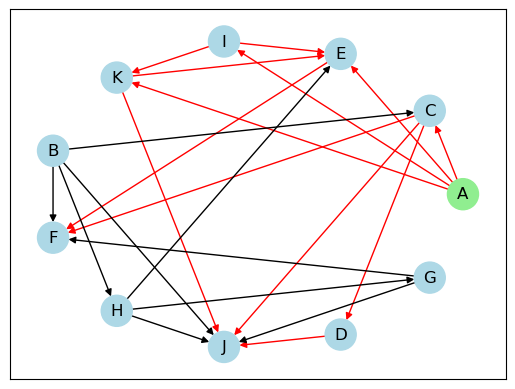

In [16]:
# Define the exposure variable
exposure = "A"

# Find all nodes in the DAG except the exposure variable
nodes = list(g1.nodes)
nodes.remove(exposure)

# Find all open paths from the exposure to every other variable in the DAG
open_paths = {}
for outcome in nodes:
    # Find all simple paths from the exposure to the outcome
    all_paths = list(nx.all_simple_paths(g1, source=exposure, target=outcome))

    # Find all open paths from the exposure to the outcome
    open_paths[outcome] = []
    for path in all_paths:
        is_open = True
        for i in range(1, len(path) - 1):
            node = path[i]
            parents = list(g1.predecessors(node))
            common_causes = set(parents).intersection(set(path[:i]))
            if not common_causes:
                is_open = False
                break
        if is_open:
            open_paths[outcome].append(path)

# Create a copy of the original DAG
g2 = g1.copy()

# Highlight the open paths in the copied DAG
edge_colors = ['black']*len(g2.edges)
for outcome in open_paths:
    for path in open_paths[outcome]:
        for i in range(len(path) - 1):
            edge = (path[i], path[i+1])
            for j, e in enumerate(g2.edges):
                if e == edge:
                    edge_colors[j] = 'red'

# Draw the copied DAG with highlighted open paths
node_sizes = [500]*len(g2.nodes)
node_colors = ['lightblue']*len(g2.nodes)
node_colors[0] = 'lightgreen' # set the color of the root node to green

pos = nx.circular_layout(g2)
nx.draw_networkx(g2, pos=pos, arrows=True, node_size=node_sizes, node_color=node_colors, edge_color=edge_colors)

plt.show()


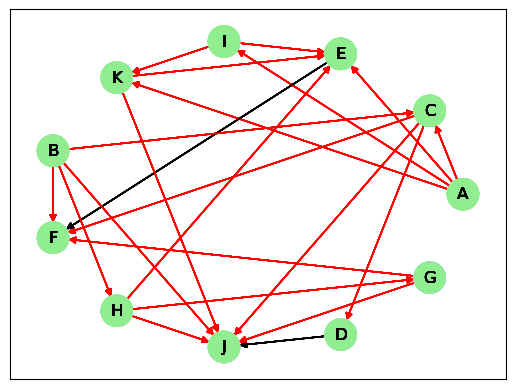

In [17]:
# Find all backdoor paths in the DAG
backdoor_paths = []
for outcome in g1.nodes:
    for exposure in g1.nodes:
        if exposure != outcome:
            ancestors_exposure = set(nx.ancestors(g1, exposure))
            descendants_outcome = set(nx.descendants(g1, outcome))
            backdoor_ancestors = ancestors_exposure - descendants_outcome
            for ancestor in backdoor_ancestors:
                paths = list(nx.all_simple_paths(g1, ancestor, outcome))
                for path in paths:
                    if set(path) & backdoor_ancestors:
                        backdoor_paths.append((exposure, ancestor, outcome))

# Create a copy of the original DAG
g2 = g1.copy()

# Highlight the backdoor paths in the copied DAG
edge_colors = ['black']*len(g2.edges)
for path in backdoor_paths:
    for i in range(len(path) - 1):
        edge = (path[i], path[i+1])
        for j, e in enumerate(g2.edges):
            if e == edge:
                edge_colors[j] = 'red'

# Draw the copied DAG with highlighted backdoor paths
node_sizes = [500]*len(g2.nodes)
node_colors = ['lightblue']*len(g2.nodes)

pos = nx.circular_layout(g2)
for i, node in enumerate(g2.nodes):
    node_colors[i] = 'lightgreen' # set the color of the outcome node to green
    nx.draw_networkx(g2, pos=pos, arrows=True, node_size=node_sizes, node_color=node_colors, edge_color=edge_colors)
  


In [ ]:
pip install --user numpy


In [26]:
pip install --user dowhy


  Using cached dowhy-0.9.1-py3-none-any.whl (301 kB)
  Using cached causal_learn-0.1.3.3-py3-none-any.whl (172 kB)
  Using cached sphinx_design-0.3.0-py3-none-any.whl (2.2 MB)
  Using cached econml-0.14.0-cp39-cp39-win_amd64.whl (932 kB)
  Using cached sparse-0.14.0-py2.py3-none-any.whl (80 kB)
  Using cached lightgbm-3.3.5-py3-none-win_amd64.whl (1.0 MB)
  Using cached shap-0.40.0-cp39-cp39-win_amd64.whl (432 kB)
  Using cached numba-0.56.4-cp39-cp39-win_amd64.whl (2.5 MB)
  Using cached llvmlite-0.39.1-cp39-cp39-win_amd64.whl (23.2 MB)
Note: you may need to restart the kernel to use updated packages.
